## Activate virtual environment

In [4]:
import os

path='/work/NLP_exam/NLP_gender_bias'
os.chdir(path)

# Make the activate.sh file executable
!chmod +x activate.sh

# Now run the script
!./activate.sh

Installed kernelspec virt_env in /home/ucloud/.local/share/jupyter/kernels/virt_env
Done! Remember changing the kernel in Jupyter.


## Load in packages

In [1]:
import json
import matplotlib.pyplot as plt

## Load in data

In [3]:
# Specify the path to your JSON file
file_path = '/work/NLP_exam/tokenized_data_by_year.json'

# Load the JSON file
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

## Investigate amount of books (list) for each year (key)

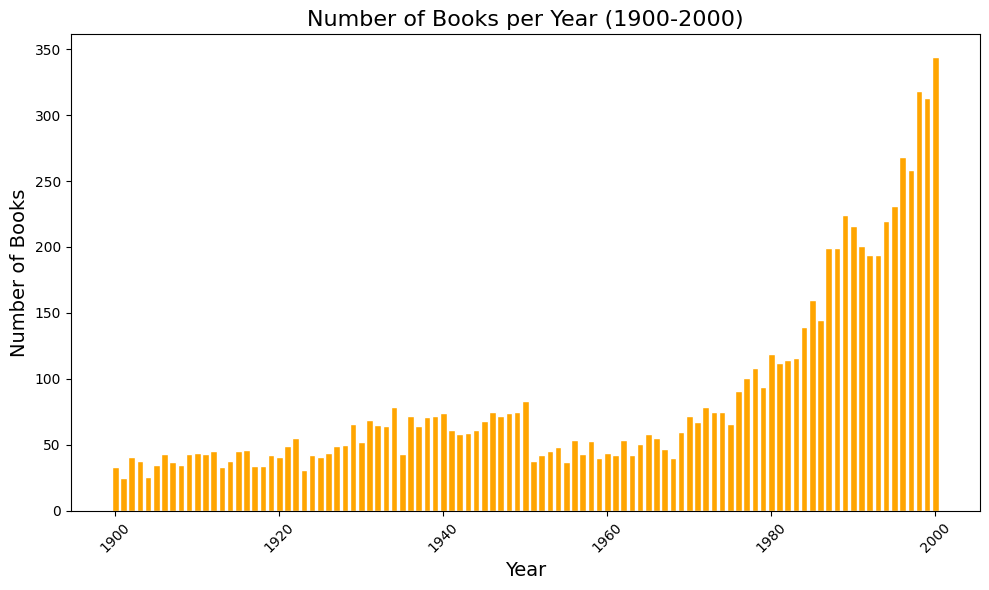

In [15]:
import os

# Define the output folder
plot_dir = '/work/NLP_exam/NLP_gender_bias/Plots'

# File path for saving the plot
file_path = os.path.join(plot_dir, 'books_per_year.png')

book_counts = {int(year): len(books) for year, books in data.items()}

# Create a list of years from 1900 to 2000, inclusive
years = list(range(1900, 2001))

# Create a list of book counts, using 0 for years with no data
counts = [book_counts.get(year, 0) for year in years]

# Plot the number of books per year
plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='orange', edgecolor='white')
plt.title('Number of Books per Year (1900-2000)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Books', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

plt.savefig(file_path)

# Show the plot
plt.show()

## Investigate instances of "he" and "she" in books for each year

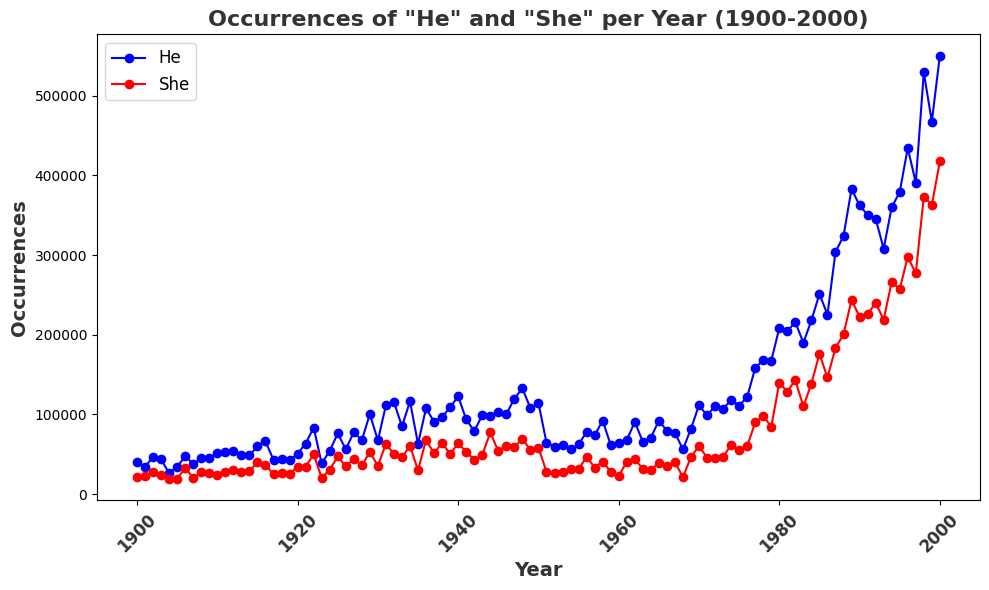

In [19]:
# File path for saving the plot
file_path_she_he = os.path.join(plot_dir, 'instances_of_he_and_she_year.png')

# Define a function to count occurrences of 'he' and 'she' in tokenized books
def count_pronouns(data, pronouns=['he', 'she']):
    # Initialize pronoun counts dictionary with years 1900 to 2000
    pronoun_counts = {pronoun: {year: 0 for year in range(1900, 2001)} for pronoun in pronouns}

    # Loop through the data and count occurrences of 'he' and 'she' in each book
    for year, books in data.items():
        # Check if the year is within the valid range (1900 to 2000)
        if int(year) < 1900 or int(year) > 2000:
            continue  # Skip years outside the range
        
        for book in books:
            for word in book:
                if word.lower() in pronouns:
                    pronoun_counts[word.lower()][int(year)] += 1

    return pronoun_counts

# Get the counts for 'he' and 'she'
pronoun_counts = count_pronouns(data, pronouns=['he', 'she'])

# Create a list of years from 1900 to 2000, inclusive
years = list(range(1900, 2001))

# Extract the counts for 'he' and 'she' (defaulting to 0 if year is missing)
he_counts = [pronoun_counts['he'].get(year, 0) for year in years]
she_counts = [pronoun_counts['she'].get(year, 0) for year in years]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the counts for 'he' and 'she'
plt.plot(years, he_counts, label="He", color='blue', marker='o')
plt.plot(years, she_counts, label="She", color='red', marker='o')

# Add title and labels with customized font
plt.title('Occurrences of "He" and "She" per Year (1900-2000)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Occurrences', fontsize=14, fontweight='bold', color='#333333')

# Set x-tick rotation for readability
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='#333333')

# Add a legend
plt.legend(fontsize=12)

# Remove the grid from the background
plt.grid(False)

# Set background color
plt.gca().set_facecolor('white')

# Tight layout to avoid clipping labels
plt.tight_layout()

plt.savefig(file_path_she_he)

# Show the plot
plt.show()

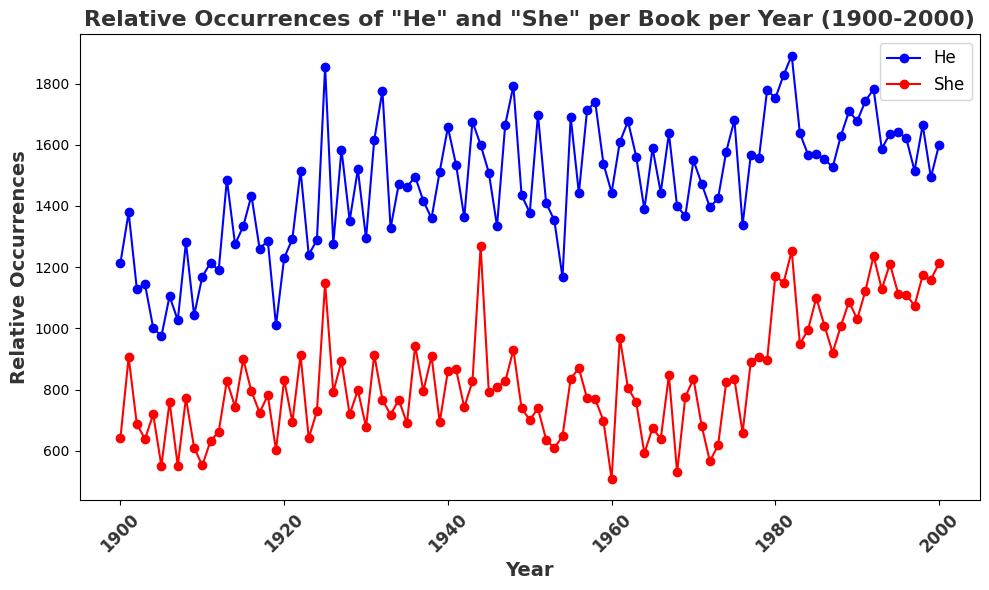

In [20]:
import matplotlib.pyplot as plt

# File path for saving the plot
file_path_she_he_relative = os.path.join(plot_dir, 'relative_instances_of_he_and_she_year.png')

# Function to count occurrences of 'he' and 'she' and calculate relative frequencies
def count_pronouns_relative(data, pronouns=['he', 'she']):
    # Initialize pronoun counts and book counts dictionary with years 1900 to 2000
    pronoun_counts = {pronoun: {year: 0 for year in range(1900, 2001)} for pronoun in pronouns}
    book_counts = {year: 0 for year in range(1900, 2001)}  # Track number of books per year

    # Loop through the data to count occurrences of 'he' and 'she' in each book
    for year, books in data.items():
        if int(year) < 1900 or int(year) > 2000:
            continue  # Skip years outside the range
        
        book_counts[int(year)] = len(books)  # Count books for the year
        for book in books:
            for word in book:
                if word.lower() in pronouns:
                    pronoun_counts[word.lower()][int(year)] += 1

    # Calculate relative frequencies (occurrences per book)
    relative_counts = {pronoun: {year: 0 for year in range(1900, 2001)} for pronoun in pronouns}
    for pronoun in pronouns:
        for year in range(1900, 2001):
            if book_counts[year] > 0:
                relative_counts[pronoun][year] = pronoun_counts[pronoun][year] / book_counts[year]

    return relative_counts, book_counts

# Get the relative counts for 'he' and 'she'
relative_counts, book_counts = count_pronouns_relative(data, pronouns=['he', 'she'])

# Create a list of years from 1900 to 2000, inclusive
years = list(range(1900, 2001))

# Extract the relative counts for 'he' and 'she'
he_relative_counts = [relative_counts['he'].get(year, 0) for year in years]
she_relative_counts = [relative_counts['she'].get(year, 0) for year in years]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the relative counts for 'he' and 'she'
plt.plot(years, he_relative_counts, label="He", color='blue', marker='o')
plt.plot(years, she_relative_counts, label="She", color='red', marker='o')

# Add title and labels with customized font
plt.title('Relative Occurrences of "He" and "She" per Book per Year (1900-2000)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Relative Occurrences', fontsize=14, fontweight='bold', color='#333333')

# Set x-tick rotation for readability
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='#333333')

# Add a legend
plt.legend(fontsize=12)

# Remove the grid from the background
plt.grid(False)

# Set background color
plt.gca().set_facecolor('white')

# Tight layout to avoid clipping labels
plt.tight_layout()

plt.savefig(file_path_she_he_relative)

# Show the plot
plt.show()
